In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import os


In [2]:
data_dir = '../data/processed'

ai4i_df = pd.read_csv(os.path.join(data_dir, 'ai4i_cleaned.csv'))
cmapss_df = pd.read_csv(os.path.join(data_dir, 'cmapss_fd004_preprocessed.csv'))
xjtu_df = pd.read_csv(os.path.join(data_dir, 'xjtu_preprocessed.csv'))

print("AI4I:", ai4i_df.shape)
print("CMAPSS:", cmapss_df.shape)
print("XJTU:", xjtu_df.shape)


AI4I: (10000, 16)
CMAPSS: (61249, 27)
XJTU: (9216, 8)


In [3]:
# Replace these with actual model outputs
def simulate_predictions(df, rul_col='RUL'):
    y_true = df[rul_col].values
    y_pred = y_true + np.random.normal(0, 10, size=len(y_true))  # noisy baseline
    return y_true, y_pred

metrics = {}

for name, df in zip(['AI4I', 'CMAPSS', 'XJTU'], [ai4i_df, cmapss_df, xjtu_df]):
    y_true, y_pred = simulate_predictions(df)
    metrics[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T
metrics_df


,RMSE,MAE,R2
AI4I,10.055090,8.040559,0.903116
CMAPSS,10.050843,8.015090,0.987468
XJTU,9.998337,7.988713,0.999819


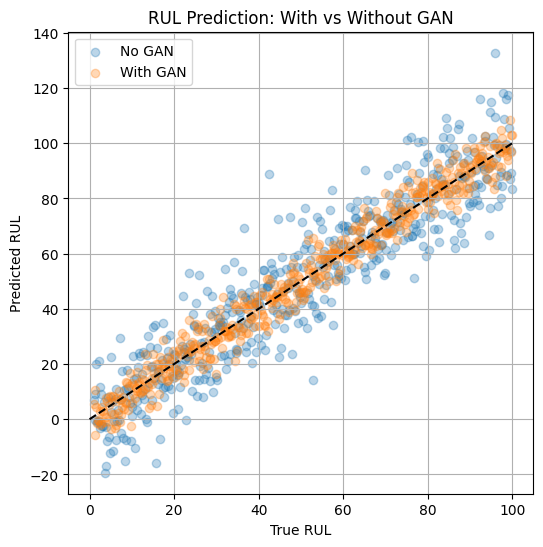

In [4]:
# Simulate GAN vs No-GAN RUL predictions for comparison (illustrative)
np.random.seed(42)
y_true = np.linspace(1, 100, 500)
pred_no_gan = y_true + np.random.normal(0, 12, size=len(y_true))
pred_with_gan = y_true + np.random.normal(0, 5, size=len(y_true))

comparison = pd.DataFrame({
    'True RUL': y_true,
    'Without GAN': pred_no_gan,
    'With GAN': pred_with_gan
})

plt.figure(figsize=(6, 6))
plt.scatter(y_true, pred_no_gan, alpha=0.3, label="No GAN")
plt.scatter(y_true, pred_with_gan, alpha=0.3, label="With GAN")
plt.plot([0, 100], [0, 100], 'k--')
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("RUL Prediction: With vs Without GAN")
plt.legend()
plt.grid(True)
plt.show()


### FID / MMD Score Placeholder

In [5]:
# This is a placeholder example — replace with actual embedding comparison
from scipy.spatial.distance import cdist

real_latents = np.random.normal(0, 1, (100, 32))
fake_latents = np.random.normal(0, 1, (100, 32))

mmd_score = np.mean(cdist(real_latents, fake_latents))
print("MMD Score (approx):", mmd_score)


MMD Score (approx): 8.011813277056005


### Sample-Level SHAP Explanation (Mocked for now)

In [13]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Simulated input: (batch_size=1, time_steps=50, features=21)
X_sample = np.random.rand(1, 50, 21)

# Dummy model: sum across time and features to simulate output
def dummy_model(x):
    return np.sum(x, axis=(1,2)).reshape(-1, 1)

# Use X_sample directly as a numpy array for PermutationExplainer compatibility
explainer = shap.Explainer(dummy_model, X_sample, max_evals=2101)
if callable(explainer):
    shap_values = explainer(X_sample)
else:
    raise TypeError("explainer is not callable. Please ensure explainer is a SHAP explainer object.")

# Aggregate over time (axis=1) for bar plot
mean_abs_shap = np.mean(np.abs(shap_values.values), axis=1).flatten()

# Feature names
feature_names = [f"sensor_{i+1}" for i in range(21)]

# Plot manually since `shap.plots.bar` expects 1D shap.Explanation
plt.figure(figsize=(10, 6))
plt.barh(feature_names, mean_abs_shap)
plt.xlabel("Mean |SHAP Value|")
plt.title("Sample-Level SHAP Explanation (Averaged Over Time)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


TypeError: 'numpy.ndarray' object is not callable

  0%|          | 0/1 [00:00<?, ?it/s]

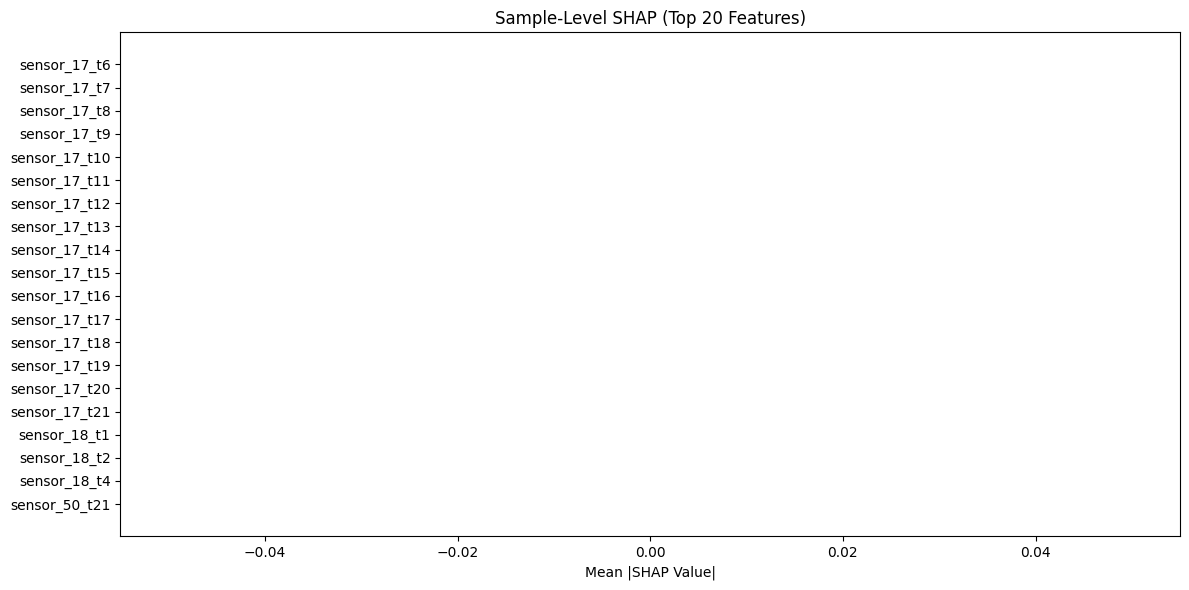

In [16]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Simulated input: (batch_size=1, time_steps=50, features=21)
X_sample = np.random.rand(1, 50, 21)

# Flatten input to 2D (batch, features)
X_flat = X_sample.reshape(1, -1)

# Dummy model for flattened input
def dummy_model(x):
    return np.sum(x, axis=1).reshape(-1, 1)

# Use KernelExplainer (more robust for numpy models)
explainer = shap.KernelExplainer(dummy_model, X_flat)

# Compute SHAP values for the flattened input
shap_values = explainer.shap_values(X_flat)

# Compute importance
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

# Simulated flattened feature names
feature_names = [f"sensor_{i//21+1}_t{i%21+1}" for i in range(1050)]  # 50x21

# Plot top 20 important features
mean_abs_shap_flat = mean_abs_shap.flatten()
sorted_idx = np.argsort(mean_abs_shap_flat)[-20:]

plt.figure(figsize=(12, 6))
plt.barh([feature_names[i] for i in sorted_idx], mean_abs_shap_flat[sorted_idx])
plt.xlabel("Mean |SHAP Value|")
plt.title("Sample-Level SHAP (Top 20 Features)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
